In [6]:

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv('Train.csv',parse_dates=['datetime'])
print(df.shape)
df.head()

(6318, 4)


,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.188850,36.931382
1,2,2018-01-01 02:02:39,-0.662939,37.208730
2,3,2018-01-01 02:31:49,-0.662939,37.208730
3,4,2018-01-01 03:04:01,-1.288087,36.826583
4,5,2018-01-01 03:58:49,-1.188850,36.931382


/home/rulz/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


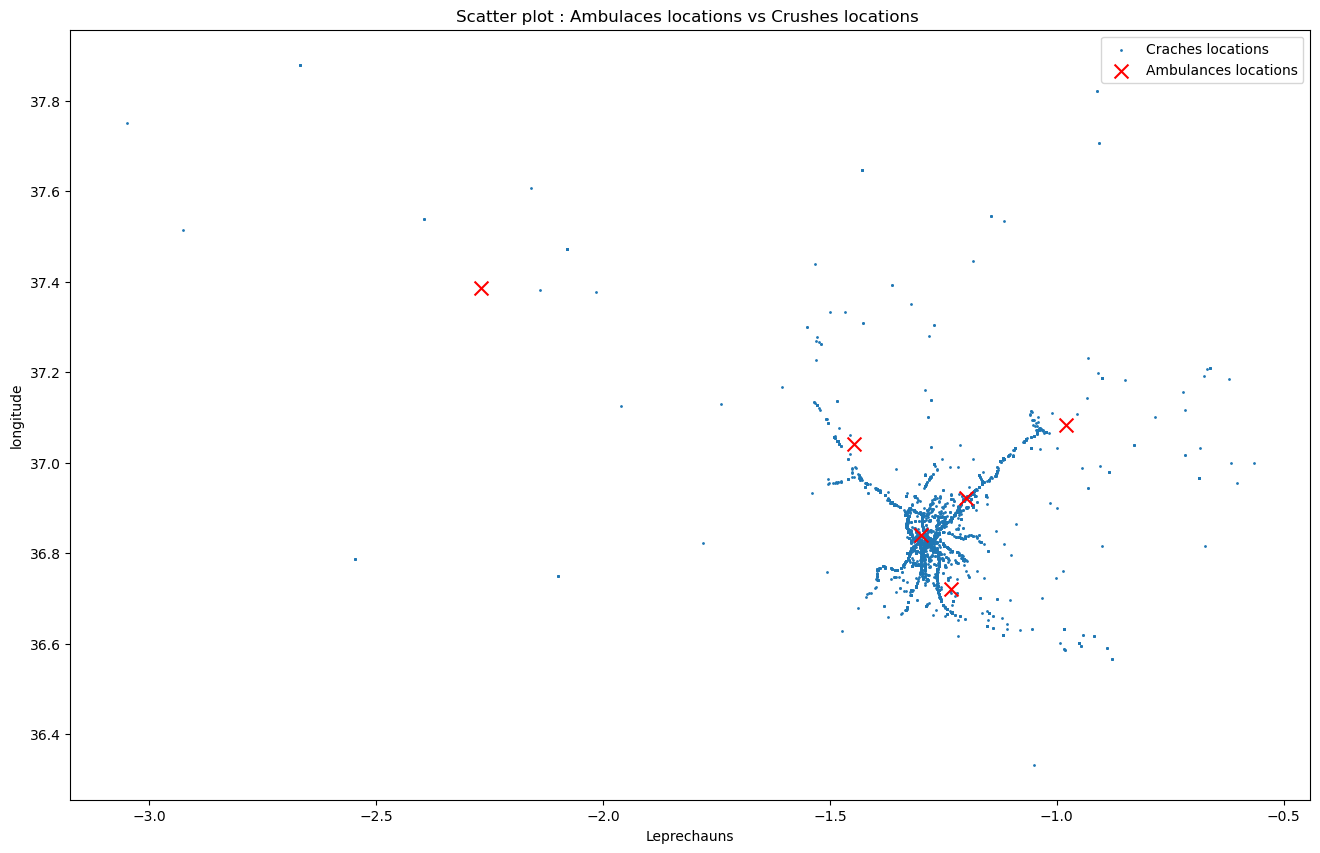

In [8]:
kmeans_global = KMeans(n_clusters=6, random_state=500).fit(df[['latitude','longitude']])

fig, axs = plt.subplots(figsize=(16, 10))

plt.scatter(x = df['latitude'],y=df['longitude'], s=1, label='Craches locations' )
plt.scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x",
            color='r',label='Ambulances locations',s=100)
axs.set_title('Scatter plot : Ambulaces locations vs Crushes locations ')
plt.xlabel("Leprechauns")
plt.ylabel("longitude")
plt.legend()
plt.show()

In [9]:
df.head(3)

,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.188850,36.931382
1,2,2018-01-01 02:02:39,-0.662939,37.208730
2,3,2018-01-01 02:31:49,-0.662939,37.208730


In [10]:
ss = pd.read_csv('SampleSubmission.csv', parse_dates=['date'])
ss.head(3)


,date,A0_Latitude,A0_Longitude,A1_Latitude,A1_Longitude,A2_Latitude,A2_Longitude,A3_Latitude,A3_Longitude,A4_Latitude,A4_Longitude,A5_Latitude,A5_Longitude
0,2019-07-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-07-01 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-07-01 06:00:00,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:

kmeans_global.cluster_centers_


array([[-1.23376874, 36.72138183],
       [-1.44781943, 37.04055723],
       [-2.26993277, 37.38589229],
       [-1.19991598, 36.92079377],
       [-0.98030485, 37.08421802],
       [-1.29857338, 36.84059481]])

In [12]:
def flaten(centers_list):
    """flatening the list of tuples [(x0,y0),(x1,y1),(x2,y2),(x3,y3)] to [x0,y0,x1,y1,x2,y2,x3,y3]"""
    merged = list(zip(centers_list[:,0],centers_list[:,1]))
    return [c for couple in merged for c in couple ]

In [13]:

flaten(kmeans_global.cluster_centers_)

[-1.2337687356622917,
 36.72138183388454,
 -1.4478194296431006,
 37.040557230169114,
 -2.26993277069289,
 37.38589228685269,
 -1.1999159825011534,
 36.92079377127236,
 -0.9803048497078652,
 37.08421801995653,
 -1.2985733829039736,
 36.84059480596963]

In [14]:
t = flaten(kmeans_global.cluster_centers_)

#now we are going to build new dataframe for the submission
d = pd.DataFrame([])
d['date'] = ss['date']
for i in range(len(t)):
    d[ss.keys()[i+1]] = t[i] #i+1 cause the first column is date
d.head()


,date,A0_Latitude,A0_Longitude,A1_Latitude,A1_Longitude,A2_Latitude,A2_Longitude,A3_Latitude,A3_Longitude,A4_Latitude,A4_Longitude,A5_Latitude,A5_Longitude
0,2019-07-01 00:00:00,-1.233769,36.721382,-1.447819,37.040557,-2.269933,37.385892,-1.199916,36.920794,-0.980305,37.084218,-1.298573,36.840595
1,2019-07-01 03:00:00,-1.233769,36.721382,-1.447819,37.040557,-2.269933,37.385892,-1.199916,36.920794,-0.980305,37.084218,-1.298573,36.840595
2,2019-07-01 06:00:00,-1.233769,36.721382,-1.447819,37.040557,-2.269933,37.385892,-1.199916,36.920794,-0.980305,37.084218,-1.298573,36.840595
3,2019-07-01 09:00:00,-1.233769,36.721382,-1.447819,37.040557,-2.269933,37.385892,-1.199916,36.920794,-0.980305,37.084218,-1.298573,36.840595
4,2019-07-01 12:00:00,-1.233769,36.721382,-1.447819,37.040557,-2.269933,37.385892,-1.199916,36.920794,-0.980305,37.084218,-1.298573,36.840595


In [15]:
d.to_csv('kmeans')

In [16]:
for i in range(0,22,3):
    d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3)]
    kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
    t = flaten(kmeans.cluster_centers_)
    ss.loc[ss['date'].dt.hour == i, ['A0_Latitude','A0_Longitude',
                                     'A1_Latitude','A1_Longitude','A2_Latitude','A2_Longitude',
                                     'A3_Latitude','A3_Longitude','A4_Latitude','A4_Longitude',
                                     'A5_Latitude','A5_Longitude']] = t


/home/rulz/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/rulz/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/rulz/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/rulz/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

In [17]:
ss.head()

,date,A0_Latitude,A0_Longitude,A1_Latitude,A1_Longitude,A2_Latitude,A2_Longitude,A3_Latitude,A3_Longitude,A4_Latitude,A4_Longitude,A5_Latitude,A5_Longitude
0,2019-07-01 00:00:00,-1.293232,36.830811,-2.497671,37.788891,-0.912302,37.067283,-1.195523,36.924074,-1.370847,36.943975,-1.246829,36.715524
1,2019-07-01 03:00:00,-1.276705,36.773866,-2.473397,37.593694,-1.224257,36.888748,-1.488993,37.142504,-1.329044,36.879593,-0.996639,37.044251
2,2019-07-01 06:00:00,-1.250317,36.731845,-2.272487,37.384144,-1.450653,37.028129,-1.053195,37.103977,-1.216162,36.897099,-1.303170,36.840072
3,2019-07-01 09:00:00,-1.026252,36.620439,-1.277269,36.869582,-1.280026,36.764459,-1.053138,37.028036,-1.456808,37.029627,-2.282399,37.312977
4,2019-07-01 12:00:00,-1.090812,36.644623,-1.282561,36.824551,-1.941905,37.501344,-0.816886,37.182421,-1.142527,36.976261,-1.375582,36.944003


In [18]:
ss.to_csv('kmeans_by time')

/home/rulz/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/rulz/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/rulz/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/rulz/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

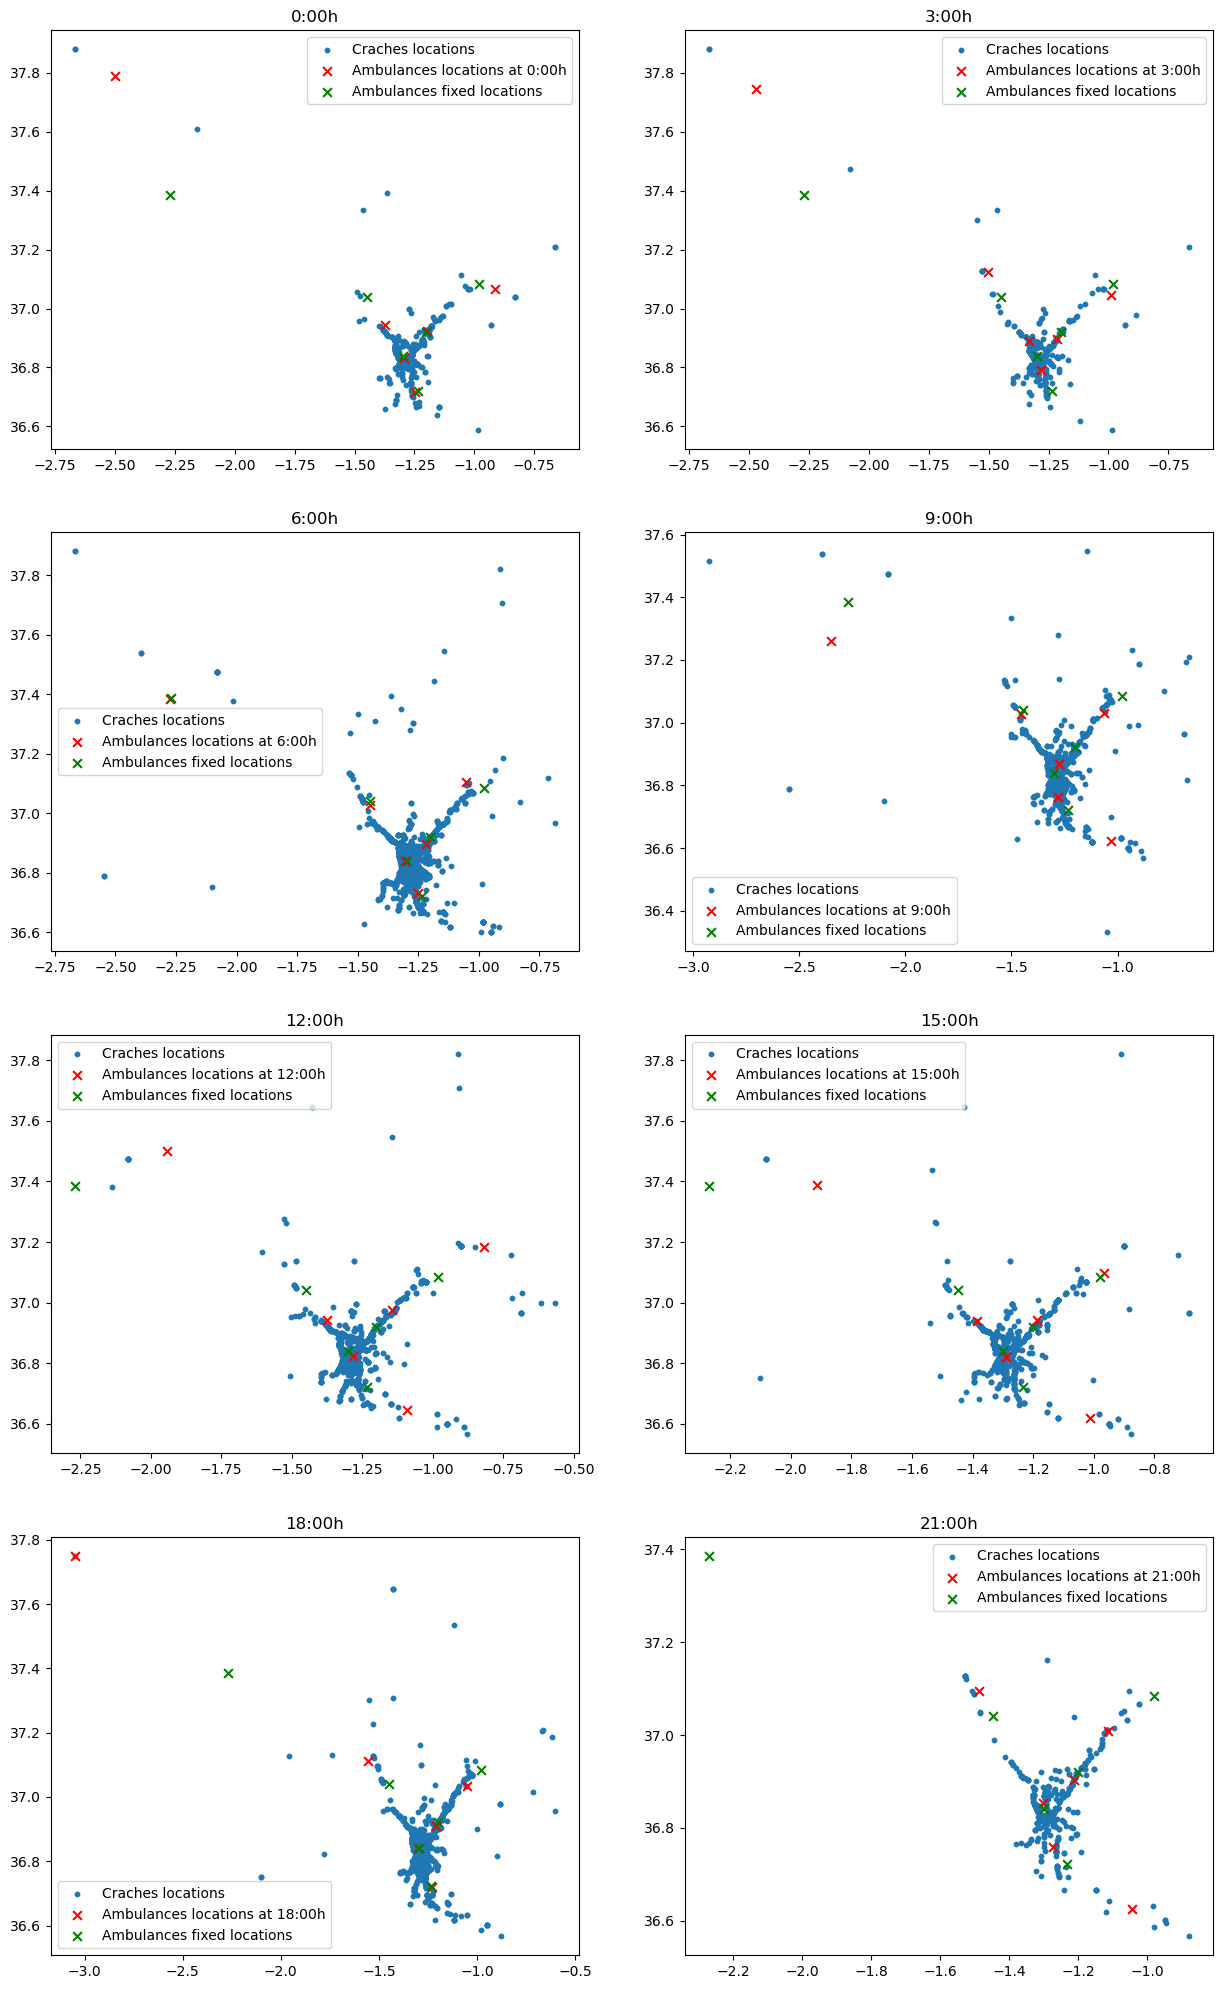

In [19]:


fig, axs = plt.subplots(4, 2,figsize=(15, 25))
models = []
i= 0
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[0, 0].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[0, 0].set_title(str(i)+':00h')
axs[0, 0].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[0, 0].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[0, 0].legend()
#########################################################

i= 3
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[0, 1].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[0, 1].set_title(str(i)+':00h')
axs[0, 1].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[0, 1].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[0, 1].legend()
########################################################


i=6
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[1, 0].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[1, 0].set_title(str(i)+':00h')
axs[1, 0].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[1, 0].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[1, 0].legend()
#########################################################

i= 9
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[1, 1].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[1, 1].set_title(str(i)+':00h')
axs[1, 1].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[1, 1].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[1, 1].legend()
########################################################


i= 12
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[2, 0].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[2, 0].set_title(str(i)+':00h')
axs[2, 0].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[2, 0].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[2, 0].legend()
########################################################

i= 15
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[2, 1].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[2, 1].set_title(str(i)+':00h')
axs[2, 1].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[2, 1].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[2, 1].legend()
########################################################


i= 18
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<=i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[3, 0].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[3, 0].set_title(str(i)+':00h')
axs[3, 0].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[3, 0].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[3, 0].legend()
########################################################

i= 21
d = df[(df['datetime'].dt.hour>=i) & (df['datetime'].dt.hour<i+3)]
kmeans = KMeans(n_clusters=6, random_state=0).fit(d[['latitude','longitude']])
models.append(kmeans)
axs[3, 1].scatter(x = d['latitude'],y=d['longitude'],s=10, label='Craches locations')
axs[3, 1].set_title(str(i)+':00h')
axs[3, 1].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],marker="x", color='r',label='Ambulances locations at '+str(i)+':00h',s=40)
axs[3, 1].scatter(x=kmeans_global.cluster_centers_[:,0], y=kmeans_global.cluster_centers_[:,1],marker="x", color='g',label='Ambulances fixed locations',s=40)
axs[3, 1].legend()
########################################################




In [20]:

for j,k in enumerate(models):
    print("from",j*3,"to",(j*3)+3)
    for i in range(6):
        print("center",i,(k.cluster_centers_[i,0],k.cluster_centers_[i,1])," :",np.sum(k.labels_== i))
    print("##################################")


from 0 to 3
center 0 (-1.293232331574883, 36.83081121533449)  : 206
center 1 (-2.49767067091915, 37.788890601409804)  : 3
center 2 (-0.9123015427482563, 37.06728259602676)  : 13
center 3 (-1.1955226759800388, 36.924074257465385)  : 88
center 4 (-1.3708469490865973, 36.94397461478787)  : 37
center 5 (-1.2468293958561238, 36.71552351137943)  : 42
##################################
from 3 to 6
center 0 (-1.2157757797187991, 36.89637501891749)  : 62
center 1 (-2.471671704418653, 37.743999601459834)  : 3
center 2 (-1.3295559586630081, 36.88904863664544)  : 91
center 3 (-1.2833838590821474, 36.790851046430575)  : 161
center 4 (-1.5010727118980631, 37.12321614743279)  : 10
center 5 (-0.9907558001414796, 37.045630826700574)  : 13
##################################
from 6 to 9
center 0 (-1.2503174542185445, 36.731844972972645)  : 482
center 1 (-2.2724866556796295, 37.38414414470723)  : 14
center 2 (-1.450653019806419, 37.02812860115538)  : 72
center 3 (-1.0531951866363374, 37.10397686608)  : 55